In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataR2.csv to dataR2.csv


# Librerias

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import seaborn as sns

# Gradiente

In [3]:
def grad_perc(x,y,alfa,iteraciones):
    dim=np.shape(x)
    unos=np.ones((dim[0],1))
    X=np.concatenate((unos,x),1)    
    pesos=np.random.rand(1,np.shape(x)[1]+1)
    y=np.reshape(y,(np.shape(y)[0],1))  
    for i in range (iteraciones):
        new_pesos=pesos-((alfa*(1/dim[1]+1))*(np.transpose((X@np.transpose(pesos))-y)@X))
        pesos=new_pesos
    
    return(pesos)

# Metricas

In [4]:
def matrix(y_true, y_pred):
    dim = np.shape(y_true)[0]
    tn = 0
    fp = 0
    tp = 0
    fn = 0
    for i in range(0,dim):
        if y_true[i] == 0 and y_pred[i] == 0:
            tn = tn + 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            fp = fp + 1
        elif y_true[i] == 1 and y_pred[i] == 1:
            tp = tp + 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            fn = fn + 1
    return tn, fp, tp, fn
        
def Exactitud(tn, fp, tp, fn):
    ex = (tp + tn)/(tp + tn + fp + fn)
    return ex
    
def presicion(tn, fp, tp, fn):
    ex = (tp)/(tp + fp)
    return ex
    
def sensibilidad(tn, fp, tp, fn):
    ex = (tp)/(tp + fn)
    return ex

def score(presicion, sensibilidad):
    ex= 2 * ((presicion * sensibilidad) / (presicion + sensibilidad))
    return ex

# Pre-procesamiento

In [5]:
def normalizar(x):
    maximos=np.max(x,0)
    minimos=np.min(x,0)
    dim=np.shape(x)
    xn=np.zeros([dim[0],dim[1]])
    for i in range(dim[1]):
        xn[:,i]=(x[:,i]-minimos[i])/(maximos[i]-minimos[i])
    return (xn)

def particion_7030(x,y):
    dim=np.shape(x)
    lab=np.random.permutation(dim[0])
    labtr=lab[0:round(dim[0]*0.7)]
    labval=lab[round(dim[0]*0.7):dim[0]+1]
    x_train=x[labtr,:]
    y_train=y[labtr,]
    x_val=x[labval,:]
    y_val=y[labval,]
    return (x_train,y_train,x_val,y_val)


# Solucion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB
marque 1 si desea trabajar con toda la base de datos o 2 si desea elegir dos caracteristicas 1
Escriba 1 si desea evaluar el algortimo normalizando los datos, o escriba 2 si desea evaluar sin normalización 1


<ipython-input-3-b7bbebc9ec58>:8: RuntimeWarning: overflow encountered in matmul
  new_pesos=pesos-((alfa*(1/dim[1]+1))*(np.transpose((X@np.transpose(pesos))-y)@X))
<ipython-input-3-b7bbebc9ec58>:8: RuntimeWarning: invalid value encountered in matmul
  new_pesos=pesos-((alfa*(1/dim[1]+1))*(np.transpose((X@np.transpose(pesos))-y)@X))


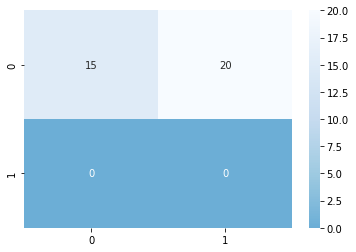

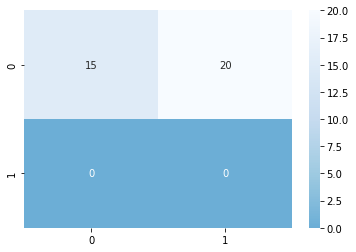

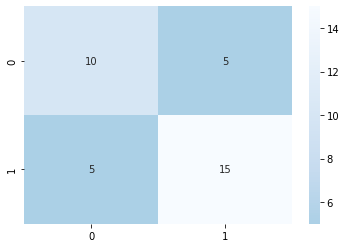

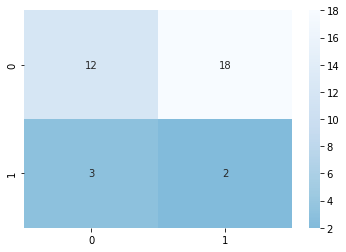

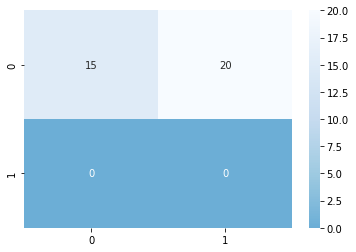

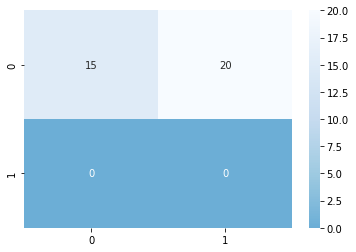

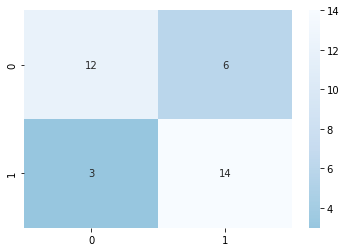

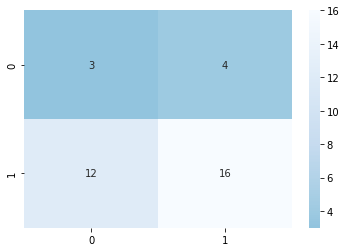

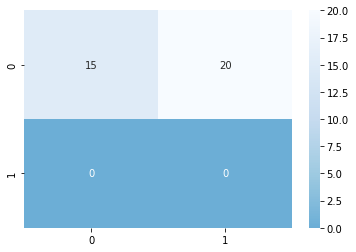

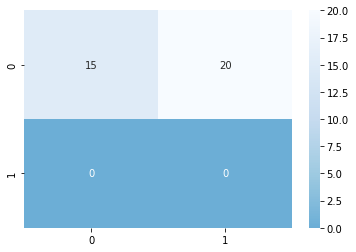

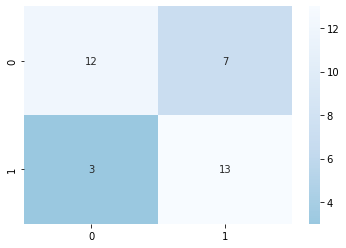

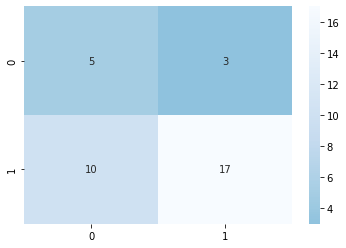

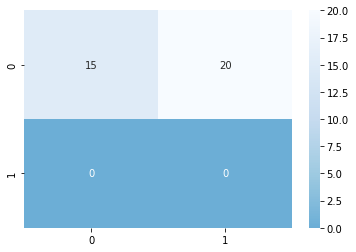

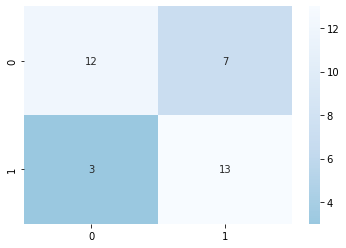

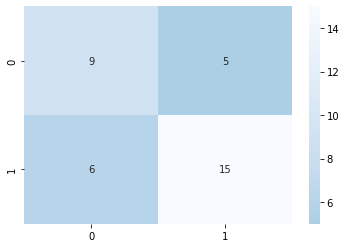

In [8]:
#%% Se carga la base de datos y se hace un analisis preliminar
  
data = pd.read_csv('dataR2.csv')
data.info()
des = data.describe()

data.Classification = data.Classification.replace({2:0})
y = np.asarray(data.Classification)
y[y==0] = -1
y_ = y

base = input('marque 1 si desea trabajar con toda la base de datos o 2 si desea elegir dos caracteristicas ')

if base == '1':    
    X = X = np.asarray(data.drop(['Classification'], axis = 1))

elif base == '2':

    c = ['Age: 1', 'BMI: 2', 'Glucose: 3', 'Insulin: 4', 'HOMA: 5', 'Leptin: 6', 'Adiponectin: 7',
           'Resistin: 8', 'MCP.1: 9', 'Classification: 10']
    
    print('caracteristicas: ', c)
    print('para seleccionar una carcateristica marque el indice indicado anteriormente')
    car_1 = input('¿cual sera la primer caracteristica? ')
    car_2 = input('¿cual sera la segunda caracteristica? ')
    c_ = data.columns
    
    X = np.array([data[c_[int(car_1)-1]], data[c_[int(car_2)-1]]]).T

#%% seleccionar como evaluar el metodo (normalizado - sin normalizar)

nor = input('Escriba 1 si desea evaluar el algortimo normalizando los datos, o escriba 2 si desea evaluar sin normalización ')

if nor == '1':
    xn = normalizar(X)
elif nor == '2':
    xn = X
else:
    print('No se reconoce la opción')
    
x_train,y_train,x_val,y_val= particion_7030(xn,y)

metricas = []
for j in [10,50, 100, 200]:
    for i in [1, 0.1, 0.01, 0.001]:
        try:
            inicio = time.time()
            pesos=grad_perc(x_train,y_train,i,j)
            dim=np.shape(x_val)
            unos=np.ones((dim[0],1))
            X_val=np.concatenate((unos,x_val),1)   
            y_predicha = np.sign(X_val@np.transpose(pesos))
            
            y_val[y_val==-1] = 0
            y_predicha[y_predicha == -1] = 0
            
            tn, fp, tp, fn = matrix(y_val, y_predicha)
            ma = pd.DataFrame([[tp, fp],[fn, tn]])
            exa = round(Exactitud(tn, fp, tp, fn),2)
            pres = round(presicion(tn, fp, tp, fn),2)
            sen = round(sensibilidad(tn, fp, tp, fn),2)
            F1 = round(score(pres, sen),2)
            fin = time.time()
            tiempo = fin-inicio
            
            plt.figure()
            sns.heatmap(ma, center=0, cmap='Blues_r', annot=True)
            metricas.append([i, j, tn, fp, tp, fn, exa,
                            pres, sen, F1, tiempo])
            
        except:
            
            continue
            
    
metricas = pd.DataFrame(metricas, columns= ['alfa', 'iteraciones',
                                            'verdaderos negativos',
                                             'falsos positivos',
                                             'verdaderos positivos',
                                             'falsos negativos',
                                             'exactitud', 'presicion',
                                             'sensibilidad', 'F1 score', 'tiempo'])



In [9]:
metricas

,alfa,iteraciones,verdaderos negativos,falsos positivos,verdaderos positivos,falsos negativos,exactitud,presicion,sensibilidad,F1 score,tiempo
0,1.000,10,0,20,15,0,0.43,0.43,1.00,0.60,0.002352
1,0.100,10,0,20,15,0,0.43,0.43,1.00,0.60,0.001579
2,0.010,10,15,5,10,5,0.71,0.67,0.67,0.67,0.001570
3,0.001,10,2,18,12,3,0.40,0.40,0.80,0.53,0.001864
4,1.000,50,0,20,15,0,0.43,0.43,1.00,0.60,0.002723
5,0.100,50,0,20,15,0,0.43,0.43,1.00,0.60,0.002580
6,0.010,50,14,6,12,3,0.74,0.67,0.80,0.73,0.002504
7,0.001,50,16,4,3,12,0.54,0.43,0.20,0.27,0.002602
8,1.000,100,0,20,15,0,0.43,0.43,1.00,0.60,0.003765
9,0.100,100,0,20,15,0,0.43,0.43,1.00,0.60,0.003881
